## Part 1: Preprocessing of the Database
Since the provided dataset is not "ready-to-use", it needs to be handled so it could be used further safely. 

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.

df = df.set_index('cityID') # Remove the indices and use cityID as index.

# Drop unnecessary columns (that explicitly imply each other)
# cityID implies City
# clusterID implies Typology
# Pollution Index is restricted to be used in prediction.
col2drop = ['City', 'Typology', 'Pollution Index ']
# col2drop = ['City', 'Typology']



df.drop(col2drop, inplace=True, axis=1) # Typology <=> clusterID, City <=> cityID, 
# df.drop("Pollution Index", axis=1)
# df.info()
# df["Pollution Index"] 

In [294]:
# df.Country

In [295]:
country_list = ["United States", "Canada", "Mexico", "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Paraguay", "Suriname", "Uruguay", "Venezuela"] 

In [296]:
country_list = ["United States", "Canada", "Mexico", "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Paraguay", "Suriname", "Uruguay", "Venezuela"] 
north_south_america = df[df.Country.isin(country_list)]
north_south_america.head()
#north_south_america = north_south_america.cityID

,clusterID,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
cityID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
285,7,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.0,0.000000,0.0,50,2.197802,NaN,0.000000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.2,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.800,31.19,81.0,0.78,45.0,72.0,14.300000,7.468901e+06,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
297,7,United States,88.6,3.6,0.5,2.7,0.64,9.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,28,1.978799,200.0,14.134276,4.0,13.0,24.0,32.0,NaN,NaN,NaN,1415000,1414,1000,82748,176893,261385,130360,81.6,1.7,56697.0,7.3,72.99,33.05,71.23,74.87,123.45,0.430,26.8,80.000,35.60,79.8,0.78,42.0,72.0,15.100000,5.061233e+06,9.799272e+09,139.620227,20332.0,1936.143187,5.579546,3.280137,1.035583,0.003187,0.022883,0.027787,0.166741,0.390862,0.730054,0.324467,0.044148,0.098736,0.680911,0.582846
322,5,Uruguay,NaN,NaN,NaN,NaN,1.74,16.6,0.0,0.000000,0.000000,0.000000,0,6.0,0.019293,1.302682,NaN,5.747126,6.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,236.03,55.12,246.31,1305000,311,4200,59144,54201,156486,83406,95.3,1.2,14010.0,NaN,67.17,19.08,54.23,63.92,36.99,0.430,10.1,77.000,43.20,60.5,0.54,35.0,NaN,2.231639,4.320735e+06,4.413598e+09,128.177488,19234.0,1021.492423,5.615612,3.212327,1.021138,0.000475,0.000000,0.088891,0.221973,0.328735,0.417286,0.222279,0.023604,0.533182,0.211993,0.501670
301,7,United States,86.8,2.6,0.8,1.8,0.60,12.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,46,2.746269,375.0,22.388060,5.0,25.0,39.0,59.0,182.18,37.33,281.76,1675000,1355,1000,343914,353889,232059,114104,81.6,1.7,61183.0,5.3,68.91,51.31,65.14,69.00,132.34,0.469,14.5,78.500,65.36,68.1,0.78,46.0,72.0,10.400000,8.997826e+06,5.336647e+09,168.640730,30832.0,593.104033,5.017710,2.785263,1.074629,0.003488,0.030033,0.032849,0.141309,0.392453,0.743335,0.333925,0.068184,0.263567,0.765455,0.379809
269,8,United States,78.0,12.0,0.7,3.1,0.71,7.8,165.4,0.024125,1.589548,25.977137,120,25.0,0.003646,0.326619,NaN,0.40

In [297]:
# north_south_america 

In [298]:
# If more than 1/3 of the values are missing the column is dropped. i.e. should be atleast 331*(2/3)=218 non-null values.
df = df.drop(['Country', 'Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)', 'Congestion (%)','Congestion AM Peak (%)','Congestion PM Peak (%)', 'Traffic Index', 'Travel Time Index', 'Inefficiency Index', 'Unemployment Rate (%)', 'Poverty Rate (%)', 'Safety Index'], axis=1)

In [299]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
print("Initial dataframe shape [rows, columns]:", df.shape)
n_NaN = df.isna().sum().sum()
print(n_NaN) # As you can see the total number of NaNs in the database 3199, so we need to impute.

# Impute all NaNs over the database.

df_int = df.select_dtypes(include='integer')
df_float = df.select_dtypes(include='float')

df_int = df_int.fillna(df.mode().iloc[0]) # Try using mean/mod for different columns.
df_float = df_float.fillna(df.mean().iloc[0]) # Try using mean/mod for different columns.

df[df_int.columns.values.tolist()] = df_int # Use mod for integers,
df[df_float.columns.values.tolist()] = df_float # Use mean for floats

# Drop taget variable straight away.
df_targets = df['CO2 Emissions per Capita (metric tonnes)']
df_inputs = df.drop(columns=['CO2 Emissions per Capita (metric tonnes)'])

Initial dataframe shape [rows, columns]: (331, 60)
1086


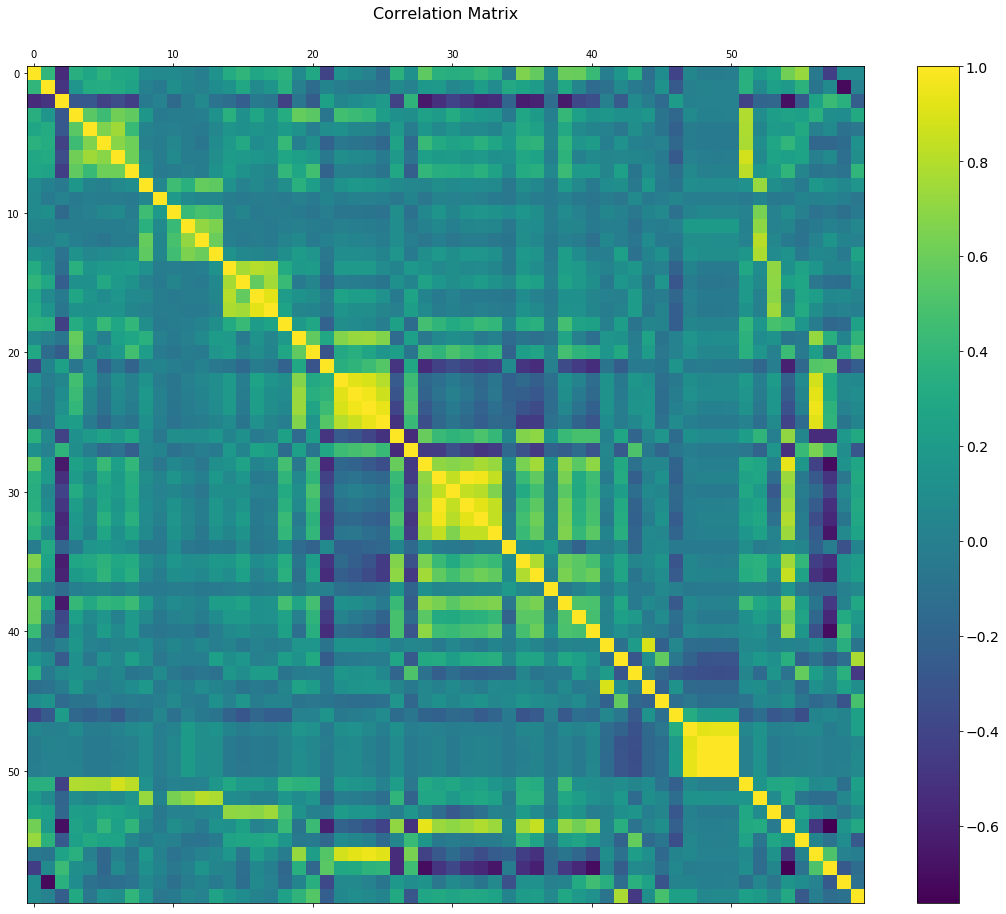

In [300]:
# df.info()'CO2 Emissions per Capita (metric tonnes)' is row nr. 40
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
#plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
#plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [301]:
col_names = list(df_inputs.columns)
print(col_names)

['clusterID', 'Gasoline Pump Price (USD/liter)', 'Road Deaths Rate (per 1000)', 'Subway Length (km)', 'Subway Length Density (per km)', 'Subway Stations per Hundred Thousand', 'Subway Ridership per Capita', 'Subway Age (years)', 'BRT Length (km)', 'BRT System Length Density (per km)', 'BRT Stations per Hundred Thousand Persons', 'BRT Fleet per Hundred Thousand Persons', 'BRT Annual Ridership per Capita', 'BRT Age (years)', 'Bikeshare Stations', 'Bikeshare Stations per Hundred Thousand Persons', 'Bikeshare Number of Bikes', 'Bikeshare Bicycles per Hundred Thousand Persons', 'Bikeshare Age (years)', 'Population', 'Land Area (sq. km)', 'Population Density (per sq. km)', 'Population Change 1990 – 2000', 'Population Change 2000 – 2010', 'Population Change 2010 – 2020', 'Population Change 2020 – 2025', 'Urbanization Rate 2015 (%)', 'Urbanization Rate Change 2015 – 2025 (pp)', 'GDP per Capita (USD)', 'Cost of Living Index', 'Rent Index', 'Grocery Index', 'Restaurant Price Index', 'Local Purch

In [302]:
# col_names = df_inputs.columns
# Normalize data before anything else.
from sklearn import preprocessing
x = df_inputs.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_unscaled =  min_max_scaler.inverse_transform(x_scaled)
df_inputs = pd.DataFrame(x_scaled)
# print(df_inputs.shape)
# df_inputs.columns = col_names
# print(df_inputs.head(5))

In [303]:
print(type(df_inputs))

<class 'pandas.core.frame.DataFrame'>


In [304]:
# Drop columns with low variance. Low variance mean they dont change much and should not contribute much to the model.

# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(threshold=0.05)
# df2 = selector.fit_transform(df_inputs)
# df2 = pd.DataFrame(df2)
# df2.shape

In [305]:
df2.columns

Index([0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 'cityID'], dtype='object')

In [306]:
# Find columns wiht high correlation and drop them.
# correlation = df2.corr()
# cols = df2.columns
# high_corr = []

# for c1 in cols:
#   for c2 in cols:
#     if c1 != c2 and c2 not in high_corr and correlation[c1][c2] > 0.9:
#       high_corr.append(c1)
    
# print(high_corr)
# df2 = df2.drop(df2.columns[high_corr], axis=1)
# print(df2.shape)

In [307]:
# df_in = df2

In [308]:
# # Reseting dataset.
# df = pd.read_excel('FINAL-COMBINED-DATASET.xlsx', index_col=0, skipinitialspace=True) # Read with excel index. 
# # Skip all white-spaces.
# # df = df_or.set_index('cityID') # Remove the indices and use cityID as index.
# # df.info()
# # Drop unnecessary columns (that explicitly imply each other)
# # cityID implies City, and Country
# # clusterID implies Typology
# # Pollution Index is restricted to be used in prediction.
# col2drop = ['Typology', 'Pollution Index ']
# df.drop(columns=col2drop, inplace=True)# Typology <=> clusterID, City <=> cityID, 
# df = df.replace(r'^\s*$', np.NaN, regex=True)
# print("Initial dataframe shape [rows, columns]:", df.shape)
# n_NaN = df.isna().sum().sum()
# print("Current total NaN values:", n_NaN) # As you can see the total number of NaNs in the database 3199, so we need to impute.
# # Impute all NaNs over the database.
# df_int = df.select_dtypes(include='integer')
# df_float = df.select_dtypes(include='float')
# # df.info() 


In [309]:
# country_list = ["United States", "Canada", "Mexico", "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Paraguay", "Suriname", "Uruguay", "Venezuela"] 

In [310]:
# north_south_america = df[df.Country.isin(country_list)]
# # north_south_america.head()
# north_south_america = north_south_america.cityID

In [311]:
# north_south_america

In [312]:
#df.info() # To see how many missing values each column has

In [313]:
# If more than 1/3 of the values are missing the column is dropped. i.e. should be atleast 331*(2/3)=218 non-null values.
# df2 = df.drop(['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)', 'Congestion (%)','Congestion AM Peak (%)','Congestion PM Peak (%)', 'Traffic Index', 'Travel Time Index', 'Inefficiency Index', 'Unemployment Rate (%)', 'Poverty Rate (%)', 'Safety Index'], axis=1)
# df = df.drop(['Car Modeshare (%)', 'Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)', 'Congestion (%)','Congestion AM Peak (%)','Congestion PM Peak (%)'], axis=1)

In [314]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

def predict_missing_values(df):
    """
    This function will take in the dataframe and for each column predict the missing values.
    It also scales the dataframe before performing value predictions. 
    """
    # Find which columns are missing values and add the column names to list.
    nan_values = df.isna()
    nan_columns = nan_values.any()
    nan_columns = df.columns[nan_columns].tolist()
    # print(nan_columns)
    # Normalize dataset
#     x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x)
#     x_unscaled =  min_max_scaler.inverse_transform(x_scaled)
#     df = pd.DataFrame(x_scaled)

    for i in nan_columns:
        test_df = df[df[i].isnull()]
        # print(test_df)
        df2 = df.dropna()
        y_train = df2[i]
        X_train = df2.drop(i, axis=1)
        X_train_scaled = min_max_scaler.fit_transform(X_train.values)
        X_train = pd.DataFrame(X_train_scaled)
        
        X_test = test_df.drop(i, axis=1)
        X_test_scaled = min_max_scaler.fit_transform(X_test.values)
        X_test = pd.DataFrame(X_test_scaled)
        # Impute all NaNs over the database.
        X_test_int = X_test.select_dtypes(include='integer')
        X_test_float = X_test.select_dtypes(include='float')
        X_test_int = X_test_int.fillna(X_test.mode().iloc[0]) # Try using mean/mod for different columns.
        X_test_float = X_test_float.fillna(X_test.mean().iloc[0]) # Try using mean/mod for different columns.
        X_test[X_test_int.columns.values.tolist()] = X_test_int # Use mod for integers,
        X_test[X_test_float.columns.values.tolist()] = X_test_float # Use mean for floats
        # print("Total nr. NaN values:", X_test.isna().sum().sum())
        # print(X_test)
        
        # Train model to fit dataset and predict missing values from column i
        # lr = LinearRegression()
        # lr.fit(X_train, y_train)
        # y_pred = lr.predict(X_test)
        rfr = RandomForestRegressor(n_estimators = 1000, max_depth = 1000, random_state = 42)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_test)
        # print(y_pred)
        #replace the missing values with predicted values
        df.loc[df[i].isnull(), i] = y_pred
        
        # print("Done with column", i)
    #df['CO2 Emissions per Capita (metric tonnes)'] = df_targets # Add the original targets back at the end.
    assert df.isna().sum().sum() == 0, "ERROR!, There still contains NaN values in the DataFrame" 
    
    return df 

In [315]:
# df = predict_missing_values(df)
print("Shape of dataframe after predicting missing values:", df.shape)
print("nr NaN values:", df.isna().sum().sum())

Shape of dataframe after predicting missing values: (331, 60)
nr NaN values: 0


In [332]:
# Normalize the database:

# df_train = df.iloc[0:tr_slice_ind]
# df_test = df.iloc[tr_slice_ind::]



# tr_mean = tr_inputs.mean() # min/max normalization
# tr_min_ = tr_inputs.min()
# tr_max_ = tr_inputs.max()

# tr_inputs = (tr_inputs-tr_mean)/(tr_max_-tr_min_)

# df_targets = df['CO2 Emissions per Capita (metric tonnes)']
# df_inputs = df.drop(columns=['CO2 Emissions per Capita (metric tonnes)'])

# df_in_mean = df_inputs.mean()
# df_in_min = df_inputs.min()
# df_in_max = df_inputs.max()

# df_in = (df_inputs - df_in_mean)/(df_in_max - df_in_min)
df_in = df_in.drop(['cityID'], axis=1)

train_perc = 0.75
tr_slice_ind = int(len(df)*0.75)+1

tr_target = df_targets[0:tr_slice_ind]
tr_inputs = df_in.iloc[0:tr_slice_ind]

ts_target = df_targets[tr_slice_ind::]
ts_inputs = df_in.iloc[tr_slice_ind::]

(249, 10)

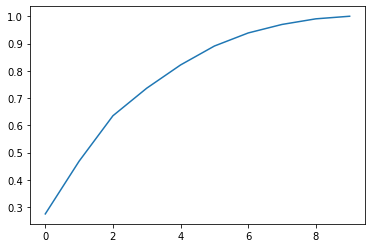

In [333]:
from sklearn.decomposition import PCA

pca = PCA()
# print(p_df.head())
# len(pca.components_)
pca.fit(tr_inputs)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);
# print(cdf[:15]) # 15 most explaining components
pca = PCA(n_components=10) # Looks to about how many components explains 95% of the total variance.
comps = pca.fit_transform(tr_inputs)
p_df = pd.DataFrame(comps)
p_df.shape

In [334]:
tr_inputs.columns

Index([0, 1, 2, 7, 8, 9, 10, 11, 12, 13], dtype='object')

In [335]:
print(pd.DataFrame(pca.components_,columns=tr_inputs.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10']))

             0         1         2         7         8         9         10  \
PC-1  -0.090616 -0.223949 -0.053666  0.456911  0.290106  0.560095  0.439650   
PC-2   0.018296  0.197272  0.196597 -0.344257 -0.215064  0.741282 -0.321177   
PC-3  -0.057560 -0.543995  0.013366 -0.479974 -0.444265 -0.060278  0.240063   
PC-4  -0.681010  0.095277  0.470303  0.127726 -0.021128 -0.032030  0.000855   
PC-5  -0.492323  0.176564 -0.328381  0.081281 -0.045358 -0.165355 -0.395734   
PC-6   0.139771 -0.005123  0.778729  0.058661  0.046892 -0.220566  0.054138   
PC-7   0.167362 -0.562829  0.121816  0.207591  0.203718  0.065120 -0.694134   
PC-8   0.317508  0.033309 -0.027787  0.200792 -0.013688 -0.217117 -0.011151   
PC-9   0.365476  0.492691  0.083124  0.121733 -0.202335  0.053853 -0.062223   
PC-10 -0.007293 -0.118704 -0.018222  0.563696 -0.764777  0.043175 -0.023833   

             11        12        13  
PC-1   0.317202 -0.183341 -0.067801  
PC-2   0.094776  0.229340 -0.207607  
PC-3   0.226505 

In [336]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


regr = RandomForestRegressor()

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

regr = RandomizedSearchCV(estimator = regr, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2)

from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(8, 32, 16), 
                   activation='relu',
                   solver = 'adam',
                   alpha = 1e-1,
                   learning_rate='adaptive',
                   learning_rate_init=2.25e-5,
                   max_iter=35000,
                   random_state = 42,
                   shuffle=False).fit(tr_inputs, tr_target)

# pca_test = pca.transform(ts_inputs)
# p_test = pd.DataFrame(pca_test)
est_out = clf.predict(ts_inputs)



In [337]:
def adjusted_r2(r_2, y, X):
    adj_r2 = 1 - (1-r_2)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return adj_r2

R_2 = r2_score(ts_target, est_out)
R_2_adj = adjusted_r2(R_2, ts_target, tr_inputs)
print(R_2, R_2_adj)

0.5044231277335138 0.4346235682593609


In [338]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

pca_test = pca.transform(ts_inputs)
p_test = pd.DataFrame(pca_test)
# print(p_test.shape)
model_SVR = SVR(C=1.0, epsilon=0.2)
print(tr_inputs.shape)
model_SVR.fit(p_df, tr_target)
est_out_svm = model_SVR.predict(p_test)
print("R2 score:", r2_score(ts_target, est_out_svm))


(249, 10)
R2 score: 0.41204374032531643


In [339]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(ts_target, est_out_svm))
print("RMSE:", rmse)
print("mean and std of targets:", np.mean(ts_target), np.std(ts_target))

RMSE: 5.480471815971179
mean and std of targets: 7.197992624012196 7.147356414769828


In [324]:
est_out_svm

array([4.39754746, 4.37079568, 4.35260128, 4.32702039, 4.31093172,
       4.29404293, 4.27646615, 4.2635967 , 4.24571727, 4.23845981,
       4.22673996, 4.21691135, 4.20327174, 4.19562964, 4.19169188,
       4.18908683, 4.18779769, 4.1848532 , 4.1794999 , 4.18533865,
       4.18500119, 4.18834806, 4.19507326, 4.19966933, 4.20626977,
       4.21397489, 4.21794726, 4.22801168, 4.24206147, 4.25263547,
       4.26533515, 4.27555995, 4.29004044, 4.30498574, 4.32060456,
       4.33608595, 4.35214529, 4.37031219, 4.38759046, 4.40911941,
       4.4275594 , 4.44551263, 4.46672656, 4.48848571, 4.50738429,
       4.52948873, 4.55249042, 4.57183982, 4.59615543, 4.61874187,
       4.63988841, 4.66374873, 4.68768482, 4.70917002, 4.73382858,
       4.75757986, 4.78009698, 4.80214405, 4.82528085, 4.84865739,
       4.87196816, 4.89654913, 4.91963245, 4.94094301, 4.96482962,
       4.98802059, 5.01033675, 5.0314668 , 5.05371612, 5.07613771,
       5.09743498, 5.11791222, 5.13960366, 5.15935986, 5.18012

In [325]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (8, 32, 16),
 'learning_rate': 'adaptive',
 'learning_rate_init': 2.25e-05,
 'max_fun': 15000,
 'max_iter': 35000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': False,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Part 2

In [326]:
north_south_america.head()

,clusterID,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
cityID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
285,7,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.0,0.000000,0.0,50,2.197802,NaN,0.000000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.2,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.800,31.19,81.0,0.78,45.0,72.0,14.300000,7.468901e+06,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
297,7,United States,88.6,3.6,0.5,2.7,0.64,9.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,28,1.978799,200.0,14.134276,4.0,13.0,24.0,32.0,NaN,NaN,NaN,1415000,1414,1000,82748,176893,261385,130360,81.6,1.7,56697.0,7.3,72.99,33.05,71.23,74.87,123.45,0.430,26.8,80.000,35.60,79.8,0.78,42.0,72.0,15.100000,5.061233e+06,9.799272e+09,139.620227,20332.0,1936.143187,5.579546,3.280137,1.035583,0.003187,0.022883,0.027787,0.166741,0.390862,0.730054,0.324467,0.044148,0.098736,0.680911,0.582846
322,5,Uruguay,NaN,NaN,NaN,NaN,1.74,16.6,0.0,0.000000,0.000000,0.000000,0,6.0,0.019293,1.302682,NaN,5.747126,6.0,0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,236.03,55.12,246.31,1305000,311,4200,59144,54201,156486,83406,95.3,1.2,14010.0,NaN,67.17,19.08,54.23,63.92,36.99,0.430,10.1,77.000,43.20,60.5,0.54,35.0,NaN,2.231639,4.320735e+06,4.413598e+09,128.177488,19234.0,1021.492423,5.615612,3.212327,1.021138,0.000475,0.000000,0.088891,0.221973,0.328735,0.417286,0.222279,0.023604,0.533182,0.211993,0.501670
301,7,United States,86.8,2.6,0.8,1.8,0.60,12.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,46,2.746269,375.0,22.388060,5.0,25.0,39.0,59.0,182.18,37.33,281.76,1675000,1355,1000,343914,353889,232059,114104,81.6,1.7,61183.0,5.3,68.91,51.31,65.14,69.00,132.34,0.469,14.5,78.500,65.36,68.1,0.78,46.0,72.0,10.400000,8.997826e+06,5.336647e+09,168.640730,30832.0,593.104033,5.017710,2.785263,1.074629,0.003488,0.030033,0.032849,0.141309,0.392453,0.743335,0.333925,0.068184,0.263567,0.765455,0.379809
269,8,United States,78.0,12.0,0.7,3.1,0.71,7.8,165.4,0.024125,1.589548,25.977137,120,25.0,0.003646,0.326619,NaN,0.40

In [355]:
# df_america = df.cityID[df.cityID.isin(north_south_america)]

# train_perc = 0.75
# tr_slice_ind = int(len(df)*0.75)+1

# df_targets["cityID"] = df.cityID
# ts_target = df_targets[tr_slice_ind::]
# ts_target.drop(["cityID"])
# df_in["cityID"] = df.cityID

# ts_inputs = df_in.iloc[tr_slice_ind::]
north_south_america=north_south_america.drop(["Country"], axis=1)

KeyError: "['cityID'] not found in axis"

In [349]:
def replace_missing_val_rescale(df):
    
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    # print("Initial dataframe shape [rows, columns]:", df.shape)
    n_NaN = df.isna().sum().sum()
    # print(n_NaN) # As you can see the total number of NaNs in the database 3199, so we need to impute.

    # Impute all NaNs over the database.

    df_int = df.select_dtypes(include='integer')
    df_float = df.select_dtypes(include='float')

    df_int = df_int.fillna(df.mode().iloc[0]) # Try using mean/mod for different columns.
    df_float = df_float.fillna(df.mean().iloc[0]) # Try using mean/mod for different columns.

    df[df_int.columns.values.tolist()] = df_int # Use mod for integers,
    df[df_float.columns.values.tolist()] = df_float # Use mean for floats

    # Drop taget variable
    df_targets = df['CO2 Emissions per Capita (metric tonnes)']
    df_inputs = df.drop(columns=['CO2 Emissions per Capita (metric tonnes)'])

    # Normalize data
    from sklearn import preprocessing
    x = df_inputs.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    x_unscaled =  min_max_scaler.inverse_transform(x_scaled)
    df_inputs = pd.DataFrame(x_scaled)
    
    assert df_inputs.isna().sum().sum() == 0, "ERROR!, There still contains NaN values in the df_inputs DataFrame"
    
    return df_inputs, df_targets

df_nsa_inputs, df_nsa_targets = replace_missing_val_rescale(north_south_america)
print("Shape before:", north_south_america.shape, "Shape after:", df_nsa_inputs.shape)

Shape before: (95, 73) Shape after: (95, 72)


In [351]:
# print(len(est_out))

95


In [352]:
df_nsa_inputs.shape

(95, 10)

In [350]:
# Make predictions for North/ South American cities.
df_nsa_inputs = df_nsa_inputs[list(tr_inputs.columns)]
print(df_nsa_inputs.shape)
# print(df_nsa_inputs.columns)
est_out = clf.predict(df_nsa_inputs)
print(len(est_out))
R_2 = r2_score(df_nsa_targets, est_out)
print("R2 score:", R_2)

(95, 10)
95
R2 score: -2.6326265560011977
